# atomman.lammps.run(lammps_command, script_name, mpi_command=None, restart_script_name=None, return_style='model', logfile='log.lammps', flatten=None)

- - -

**Lucas M. Hale**, [lucas.hale@nist.gov](mailto:lucas.hale@nist.gov?Subject=ipr-demo), *Materials Science and Engineering Division, NIST*.

**Chandler A. Becker**, [chandler.becker@nist.gov](mailto:chandler.becker@nist.gov?Subject=ipr-demo), *Office of Data and Informatics, NIST*.

**Zachary T. Trautt**, [zachary.trautt@nist.gov](mailto:zachary.trautt@nist.gov?Subject=ipr-demo), *Materials Measurement Science Division, NIST*.

Version: 2017-04-20

[Disclaimers](http://www.nist.gov/public_affairs/disclaimer.cfm) 
 
- - -

## Introduction

The run function executes a LAMMPS simulation with a supplied input script. This function runs LAMMPS as a subproces making it possible to use any working LAMMPS (and MPI) executables available to you. The standard screen output is automatically parsed using the [log_extract](atomman.lammps.log_extract.ipynb) function, and the resulting [DataModelDict](https://github.com/usnistgov/DataModelDict) is returned. Any errors issued by LAMMPS are passed forward as Python errors.

Arguments:

- __lammps_command__ -- a string or list of terms giving the LAMMPS executable to use and any options (except for the input file).

- __script_name__ -- name of the LAMMPS input script file name to use.

- __ mpi_command__ -- optional string or list of terms giving the MPI executable to use and any options. If not given, LAMMPS will run serially.

- __restart_script_name__ -- alternative script to use for restarting if logfile already exists. Default is None (no restarting).

- __return_style__ -- format for the returned data. Default value is 'model' (for now).
    
    - 'model' -- returns a DataModelDict of the data
    
    - 'object' -- returns an atomman.lammps.Log object 
    
- __logfile__ -- specifies the path to the logfile to write to. Default value is 'log.lammps'.

- __flatten__ -- indicates if the simulation data should be flattened to a single table. Default value is None (no flattening).

    - None -- leave all individual runs/restarts as separate tables.
    
    - 'first' -- only use the first entry for a given Step value.
    
    - 'last' -- only use the last entry for a given Step value.


The underlying code can be found in [atomman/lammps/normalize.py](../../atomman/lammps/normalize.py).

## Demonstration

In [1]:
#Standard libraries
from __future__ import print_function
import time

#http://matplotlib.org/
import matplotlib.pyplot as plt
%matplotlib inline

#https://github.com/usnistgov/atomman 
import atomman.lammps as lmp

### Run in serial

Define your LAMMPS command to use. __This will be specific to your computer!__

In [2]:
lammps_command = 'lmp_serial'

Create a simple LAMMPS script

In [3]:
with open('demo.in', 'w') as f:
    f.write("""
#Simple demonstration LAMMPS script

units metal
atom_style atomic
boundary p p p 

lattice fcc 3.52 origin 0.100000 0.100000 0.100000 
        
region box block 0 10 0 10 0 10
create_box 1 box
create_atoms 1 box

mass 1 58.71

pair_style lj/cut 6
pair_coeff 1 1 0.5408 2.272

velocity all create 100 2987532

thermo 100
thermo_style custom step pe temp press lx ly lz

restart 10000 *.restart

timestep 0.01

fix 1 all npt temp 100 100 1.0 aniso 0.0 0.0 10.0
run 10000
""")

Run

In [4]:
start = time.time()
results = lmp.run(lammps_command, 'demo.in')
end = time.time()
serial_run_time = end-start

print("Serial simulation took", serial_run_time, "seconds.")

Serial simulation took 39.6819999218 seconds.


### Access results

The results are returned as an object of the [Log](atomman.lammps.Log.ipynb) class. The Log class stores all the thermodynamic simulation data as a list of pandas DataFrames making it easy to access. By default, the data for each run/minimization is stored as a separate DataFrame. 

Check how many sets of simulations

In [5]:
sims = results.simulations
print(len(sims), 'simulation run(s) in Log')

1 simulation run(s) in Log


View thermo Dataframe

In [6]:
thermo = sims[0]['thermo']
thermo

,Step,PotEng,Temp,Press,Lx,Ly,Lz
0,0,-17521.075,100.000000,4338.54900,35.200000,35.200000,35.200000
1,100,-17486.727,51.626980,474.28508,35.222382,35.223819,35.222141
2,200,-17483.748,59.101145,-7387.53250,35.242121,35.243545,35.241472
3,300,-17480.057,67.028264,-467.33503,35.228265,35.228713,35.228042
4,400,-17476.086,76.266168,4720.89240,35.218649,35.219584,35.217337
5,500,-17469.537,81.565628,645.89408,35.231424,35.231958,35.229340
6,600,-17465.650,91.036408,-3641.02260,35.243368,35.242693,35.242312
7,700,-17462.782,100.252790,-697.52134,35.238219,35.237599,35.236981
8,800,-17458.313,102.684660,2989.86000,35.232223,35.232499,35.228823
9,900,-17456.812,103.248090,481.05784,35.238298,35.238371,35.235946


Plot Lx,Ly,Lz vs Step

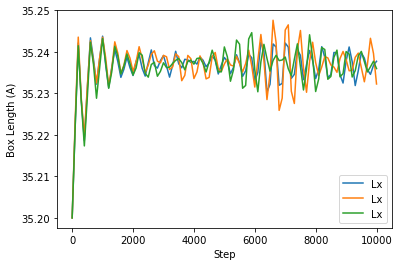

In [7]:
plt.plot(thermo.Step, thermo.Lx, label='Lx')
plt.plot(thermo.Step, thermo.Ly, label='Lx')
plt.plot(thermo.Step, thermo.Lz, label='Lx')

plt.legend()
plt.xlabel('Step')
plt.ylabel('Box Length (A)')
plt.show()

### Retrieving data as a model using return_style

Using the return_style = 'model' option will convert the Log object into an equivalent structured DataModelDict representation. This is equivalent to what is returned by the [Log.model()](atomman.lammps.Log.model.ipynb) method. This option is mainly for compatibility with scripts created prior to the Log class when the model representation was the only representation.

### Run with multiple processors

Here, we run the same simulation in parallel by supplying your mpi_command. The mpi_command is the full command associated with running the lammps_command with a specific MPI software. __This will be specific to your computer!__

In [8]:
lammps_command = 'lmp_mpi'
mpi_command = 'mpiexec -localonly 4'

In [9]:
start = time.time()
results = lmp.run(lammps_command, 'demo.in', mpi_command)
end = time.time()
parallel_run_time = end-start

print("Serial simulation took", serial_run_time, "seconds.")
print("Parallel simulation took", parallel_run_time, "seconds")

Serial simulation took 39.6819999218 seconds.
Parallel simulation took 14.4040000439 seconds


### Get LAMMPS error and rename logfile

The run function passes any errors raised by LAMMPS to become errors in Python. This allows for easy debugging in Python.

Here, we create the same LAMMPS script above but misspell 'origin' in the lattice command.

In [10]:
with open('error.in', 'w') as f:
    f.write("""
#Simple demonstration LAMMPS script

units metal
atom_style atomic
boundary p p p 

lattice fcc 3.52 orign 0.100000 0.100000 0.100000 
        
region box block 0 10 0 10 0 10
create_box 1 box
create_atoms 1 box

mass 1 58.71

pair_style lj/cut 6
pair_coeff 1 1 0.5408 2.272

velocity all create 100 2987532

thermo 100
thermo_style custom step pe temp press lx ly lz

timestep 0.01

fix 1 all npt temp 100 100 1.0 aniso 0.0 0.0 10.0
run 10000
""")

Running and catching the error. Note that the logfile has also been changed to 'error.lammps'.

In [11]:
try:
    results = lmp.run(lammps_command, 'error.in', logfile='error.lammps')
except Exception, e:
    print(e)

Invalid LAMMPS input: 
ERROR: Illegal lattice command (../lattice.cpp:226)


Looking at 'error.lammps' to prove that it exists.

In [12]:
with open('error.lammps') as f:
    print(f.read())

LAMMPS (27 Aug 2016-ICMS)
  using 1 OpenMP thread(s) per MPI task

#Simple demonstration LAMMPS script

units metal
atom_style atomic
boundary p p p

lattice fcc 3.52 orign 0.100000 0.100000 0.100000
ERROR: Illegal lattice command (../lattice.cpp:226)



### Restarting a simulation

The run function also supports the ability to restart and continue a simulation. If restart_script_name is supplied, the function will see if logfile already exists. If logfile does not exist, then the script_name script will be performed normally. If logfile does exist, then the following additional actions will be performed:

1. The existing logfile is renamed with an incremental number such that the logs of all previous runs are retained.

2. LAMMPS is executed using the restart_script_name script instead of the script_name script.

3. The data in all matching logfiles (previous and current) will be read in and contained in the Log object returned.


Create a restart script for demo

In [13]:
with open('restart.in', 'w') as f:
    f.write("""
#Simple demonstration LAMMPS script

read_restart *.restart

pair_style lj/cut 6
pair_coeff 1 1 0.5408 2.272

thermo 100
thermo_style custom step pe temp press lx ly lz

restart 10000 *.restart

fix 1 all npt temp 100 100 1.0 aniso 0.0 0.0 10.0
run 20000 upto
""")

Call run using restart_script_name.

In [14]:
results = lmp.run(lammps_command, 'demo.in', restart_script_name='restart.in')

Each run/minimization in each log file is stored in a separate simulation of the Log object to ensure that no data is lost. 

In [15]:
sims = results.simulations
print(len(sims), 'simulation run(s) in Log')

for i, sim in enumerate(sims):
    steps = sim['thermo'].Step
    print('Simulation', i, 'has', len(steps), 'steps ranging', steps.min(), 'to', steps.max())
    

2 simulation run(s) in Log
Simulation 0 has 101 steps ranging 0 to 10000
Simulation 1 has 101 steps ranging 10000 to 20000


### Flattening thermo data into a single DataFrame

The flatten keyword allows for multiple simulations in a Log file to be reduced to a single set of data. The two options are 'first' and 'last', which indicate whether the first or last appearance of a specific Step value is retained. Which one to use depends on the simulation design. Equivalently, one could call the [Log.flatten()](atomman.lammps.Log.flatten.ipynb) method after the simulation has finished.

__Note__: by the nature of the 'first' and 'last' options, some data will be lost when Step values overlap.

Run with restart and flatten. (The run upto command means that the new simulation will run for 0 steps)

In [16]:
results = lmp.run(lammps_command, 'demo.in', restart_script_name='restart.in', flatten='first')

Show that results only has one simulation with steps from both the original and restart runs.

In [17]:
sims = results.simulations
print(len(sims), 'simulation run(s) in Log')

for i, sim in enumerate(sims):
    steps = sim['thermo'].Step
    print('Simulation', i, 'has', len(steps), 'steps ranging', steps.min(), 'to', steps.max())

1 simulation run(s) in Log
Simulation 0 has 201 steps ranging 0 to 20000


File cleanup

In [18]:
import os
os.remove('demo.in')
os.remove('log.lammps')
os.remove('error.in')
os.remove('error.lammps')
os.remove('restart.in')
os.remove('log-1.lammps')
os.remove('log-2.lammps')
os.remove('10000.restart')
os.remove('20000.restart')

- - -
__Docs Navigation:__

Tutorial:

1. [Basics](../tutorial/1 Basics.ipynb)

2. [LAMMPS Functionality](../tutorial/2 LAMMPS Functionality.ipynb)

3. [Defect Generation and Evaluation](../tutorial/3 Defect Generation and Evaluation.ipynb)


Reference:

- [atomman](../reference/atomman.ipynb)

- [atomman.convert](../reference/atomman.convert.ipynb)

- [atomman.defect](../reference/atomman.defect.ipynb)

- [atomman.lammps](../reference/atomman.lammps.ipynb)

- [atomman.tools](../reference/atomman.tools.ipynb)

- [atomman.unitconvert](../reference/atomman.unitconvert.ipynb)